**<h2>Step 1: Import necessary Libraries</h2>**

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import os
import glob
import sys
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

**<h2>Step 2: Downloading nltk data required for tokenization, stopwords and lemmatization</h2>**

In [10]:
print("--- Checking and downloading NLTK data ---")
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
print("--- NLTK data is ready. ---")

--- Checking and downloading NLTK data ---


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


--- NLTK data is ready. ---


**<h2>Step 3: Importing .txt files stored in folder</h2>**

In [3]:
DOCUMENTS_DIR = "my_documents"

**<h2>Step 4: To check if the folder exists and to access the .txt files</h2>**

In [4]:
if not os.path.isdir(DOCUMENTS_DIR):
    print(f"Error: Directory '{DOCUMENTS_DIR}' not found.")
    print("Please create it and add your .txt files.")
    sys.exit() 

# Find all .txt files
file_paths = glob.glob(os.path.join(DOCUMENTS_DIR, '*.txt'))

if not file_paths:
    print(f"Error: No .txt files found in '{DOCUMENTS_DIR}'.")
    sys.exit()

**<h2>Step 5: Reading the content of each file</h2>**

In [5]:
documents = []
doc_names = []
for file_path in file_paths:
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            documents.append(f.read())
        doc_names.append(os.path.splitext(os.path.basename(file_path))[0])
    except Exception as e:
        print(f"Could not read file {file_path}: {e}")


print(f"--- Loaded {len(documents)} documents from '{DOCUMENTS_DIR}'. ---")
print("Documents found:", doc_names)

--- Loaded 9 documents from 'my_documents'. ---
Documents found: ['BattleCreekDec19_2019', 'BemidjiSep18_2020', 'CharlestonFeb28_2020', 'CharlotteMar2_2020', 'CincinnatiAug1_2019', 'ColoradorSpringsFeb20_2020', 'DallasOct17_2019', 'DesMoinesJan30_2020', 'FayettevilleSep9_2019']


**<h2>Step 6: Preprocess the Text</h2>**

In [16]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove punctuation and non-alphabetic characters
    tokens = [word for word in tokens if word.isalpha()]
    
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    return " ".join(tokens)

# Apply the preprocessing to all documents
preprocessed_docs = [preprocess_text(doc) for doc in documents]

print(f"Showing example for document: '{doc_names[0]}'")
print(f"Preprocessed text: '{preprocessed_docs[0]}'")

Showing example for document: 'BattleCreekDec19_2019'
Preprocessed text: 'thank thank thank vice president penny good guy done great job together merry christmas michigan thank michigan victory michigan victory one great greatest evening thrilled thousand hardworking patriot celebrate miracle christmas greatness america glory god thank much notice everybody saying merry christmas notice saying merry christmas remember first started beautiful trip beautiful journey said first lady lucky took fantastic journey much fun want impeach want worse way way way really feel like impeached country better ever nothing wrong nothing wrong tremendous support republican party like never nobody ever kind support sacred season country thriving thriving truly like never never happened extent happening way state u local government u job done understand fixing pothole word road want raise gasoline tax want fixing pothole michigan best year ever best year ever auto company expanding thriving coming japan c

**<h2>Step 7: Convert text into TF-IDF vectors</h2>**

In [12]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_docs)

print(f"\n--- TF-IDF matrix created with shape: {tfidf_matrix.shape} ---")


--- TF-IDF matrix created with shape: (9, 4154) ---


**<h2>Step 8: Compute cosine similarity</h2>**

In [13]:
# - A value of 1 means the documents are identical.
# - A value of 0 means the documents are completely different.

similarity_matrix = cosine_similarity(tfidf_matrix)

# wrapping it into a dataframe
sim_df = pd.DataFrame(similarity_matrix, index=doc_names, columns=doc_names)

print("\n--- Cosine Similarity Matrix: ---")
print(sim_df.round(2))


--- Cosine Similarity Matrix: ---
                            BattleCreekDec19_2019  BemidjiSep18_2020  \
BattleCreekDec19_2019                        1.00               0.80   
BemidjiSep18_2020                            0.80               1.00   
CharlestonFeb28_2020                         0.78               0.72   
CharlotteMar2_2020                           0.72               0.65   
CincinnatiAug1_2019                          0.75               0.68   
ColoradorSpringsFeb20_2020                   0.78               0.74   
DallasOct17_2019                             0.81               0.76   
DesMoinesJan30_2020                          0.81               0.74   
FayettevilleSep9_2019                        0.78               0.70   

                            CharlestonFeb28_2020  CharlotteMar2_2020  \
BattleCreekDec19_2019                       0.78                0.72   
BemidjiSep18_2020                           0.72                0.65   
CharlestonFeb28_2020        

**<h2> Step 9: Find and Display Top 3 Most Similar Pairs</h2>**


--- Top 3 Most Similar Document Pairs: ---
1. Pair: (BattleCreekDec19_2019, DesMoinesJan30_2020)
   Similarity Score: 0.8139
   BattleCreekDec19_2019
   DesMoinesJan30_2020'

2. Pair: (BattleCreekDec19_2019, DallasOct17_2019)
   Similarity Score: 0.8108
   BattleCreekDec19_2019
   DallasOct17_2019'

3. Pair: (BattleCreekDec19_2019, BemidjiSep18_2020)
   Similarity Score: 0.8021
   BattleCreekDec19_2019
   BemidjiSep18_2020'



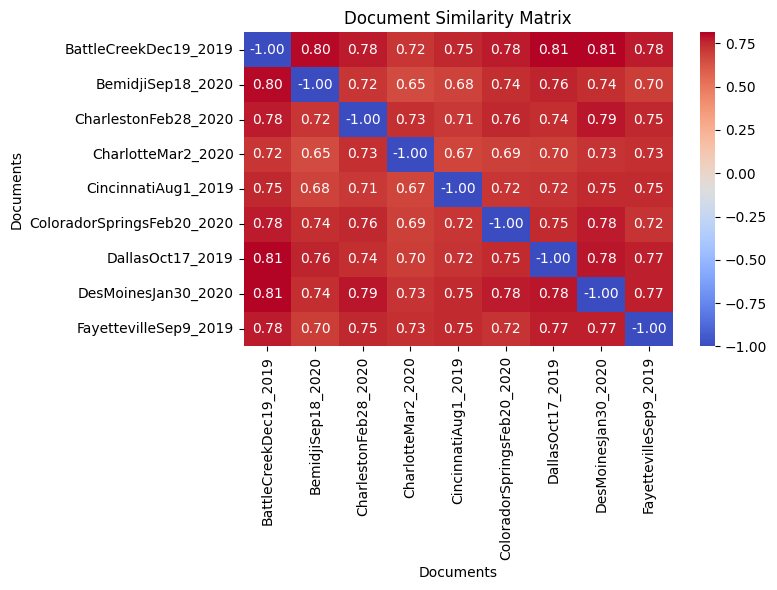

In [15]:

# set the diagonal to a very low value to ignore it
np.fill_diagonal(similarity_matrix, -1)

# Find the indices of the top N similarity scores
top_indices = np.unravel_index(np.argsort(similarity_matrix, axis=None)[-6:], similarity_matrix.shape)

# Create a set to store unique pairs
similar_pairs = set()
for i in range(len(top_indices[0])):
    doc1_index = top_indices[0][i]
    doc2_index = top_indices[1][i]
    
    if doc1_index != doc2_index:
        pair = tuple(sorted((doc1_index, doc2_index)))
        score = similarity_matrix[doc1_index, doc2_index]
        similar_pairs.add((pair[0], pair[1], score))

# Sort the pairs by score in descending order and get the top 3
top_3_pairs = sorted(list(similar_pairs), key=lambda x: x[2], reverse=True)[:3]

print("\n--- Top 3 Most Similar Document Pairs: ---")
for i, (doc1_idx, doc2_idx, score) in enumerate(top_3_pairs):
    print(f"{i+1}. Pair: ({doc_names[doc1_idx]}, {doc_names[doc2_idx]})")
    print(f"   Similarity Score: {score:.4f}")
    print(f"   {doc_names[doc1_idx]}")
    print(f"   {doc_names[doc2_idx]}'\n")

plt.figure(figsize=(8, 6))
sns.heatmap(sim_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Document Similarity Matrix")
plt.xlabel("Documents")
plt.ylabel("Documents")
plt.tight_layout()
plt.show()
